# Anomaliedetectie a.d.h.v. interkwartielafstandenop Gentse parkingdata

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date, timedelta
import time

### Inlezen van de data

In [14]:
parking_data = pd.read_csv('./p10.csv')
parking_data.columns = ['timestamp', 'value']
parking_data['timestamp'] = pd.to_datetime(parking_data['timestamp'])
print(parking_data)

                timestamp  value
0     2019-06-20 12:59:00    420
1     2019-06-20 13:14:00    425
2     2019-06-20 13:29:00    432
3     2019-06-20 13:44:00    427
4     2019-06-20 13:58:00    428
...                   ...    ...
36738 2020-07-13 17:44:00    594
36739 2020-07-13 17:54:00    594
36740 2020-07-13 18:10:00    596
36741 2020-07-13 18:29:00    595
36742 2020-07-13 18:41:00    598

[36743 rows x 2 columns]


### Detecteren van anomalieën a.d.h.v. interkwartielafstanden op basis van 2 weken data

In [15]:
anomalies_week = pd.DataFrame(columns=['timestamp', 'value'])
start_time = time.time()
for _, row in parking_data.iterrows():
    # get batch of previous week of data
    current_timestamp = row['timestamp']
    week_prior = current_timestamp - timedelta(weeks=2)
    data_past_week = parking_data[(parking_data['timestamp'] >= week_prior) & (parking_data['timestamp'] <= current_timestamp)]
    quantiles = data_past_week['value'].quantile([0.25, 0.75])
    iqr = quantiles[0.75] - quantiles[0.25]
    min_value = quantiles[0.25] - 1.5*iqr
    max_value = quantiles[0.75] + 1.5*iqr
    if not min_value <= row['value'] <= max_value:
        anomalies_week = anomalies_week.append(row)
        
execution_time = time.time() - start_time

In [16]:
print(f'Script executed in: {execution_time} seconds')
print('')
print(anomalies_week)

Script executed in: 59.18381404876709 seconds

                timestamp value
8     2019-06-20 14:59:00   449
9     2019-06-20 15:14:00   459
1542  2019-07-06 14:44:00   248
1543  2019-07-06 14:58:00   220
1544  2019-07-06 15:14:00   206
...                   ...   ...
34519 2020-06-20 14:59:00   474
34520 2020-06-20 15:13:00   469
34521 2020-06-20 15:29:00   470
34522 2020-06-20 15:44:00   473
34523 2020-06-20 16:00:00   475

[653 rows x 2 columns]


### Plotten van de data met aanduiding van de gedetecteerde anomalieën

In [17]:
# Kolom met timestamps omzetten naar DateTime types en instellen als index voor het originele DataFrame
parking_timestamp_index_week = parking_data.copy(deep=True)
parking_timestamp_index_week['timestamp'] = pd.to_datetime(parking_timestamp_index_week['timestamp'])
parking_timestamp_index_week = parking_timestamp_index_week.set_index('timestamp')

# Timestamp bij anomalieën ook omzetten naar DateTime types
anomalies_week['timestamp'] = pd.to_datetime(anomalies_week['timestamp'])

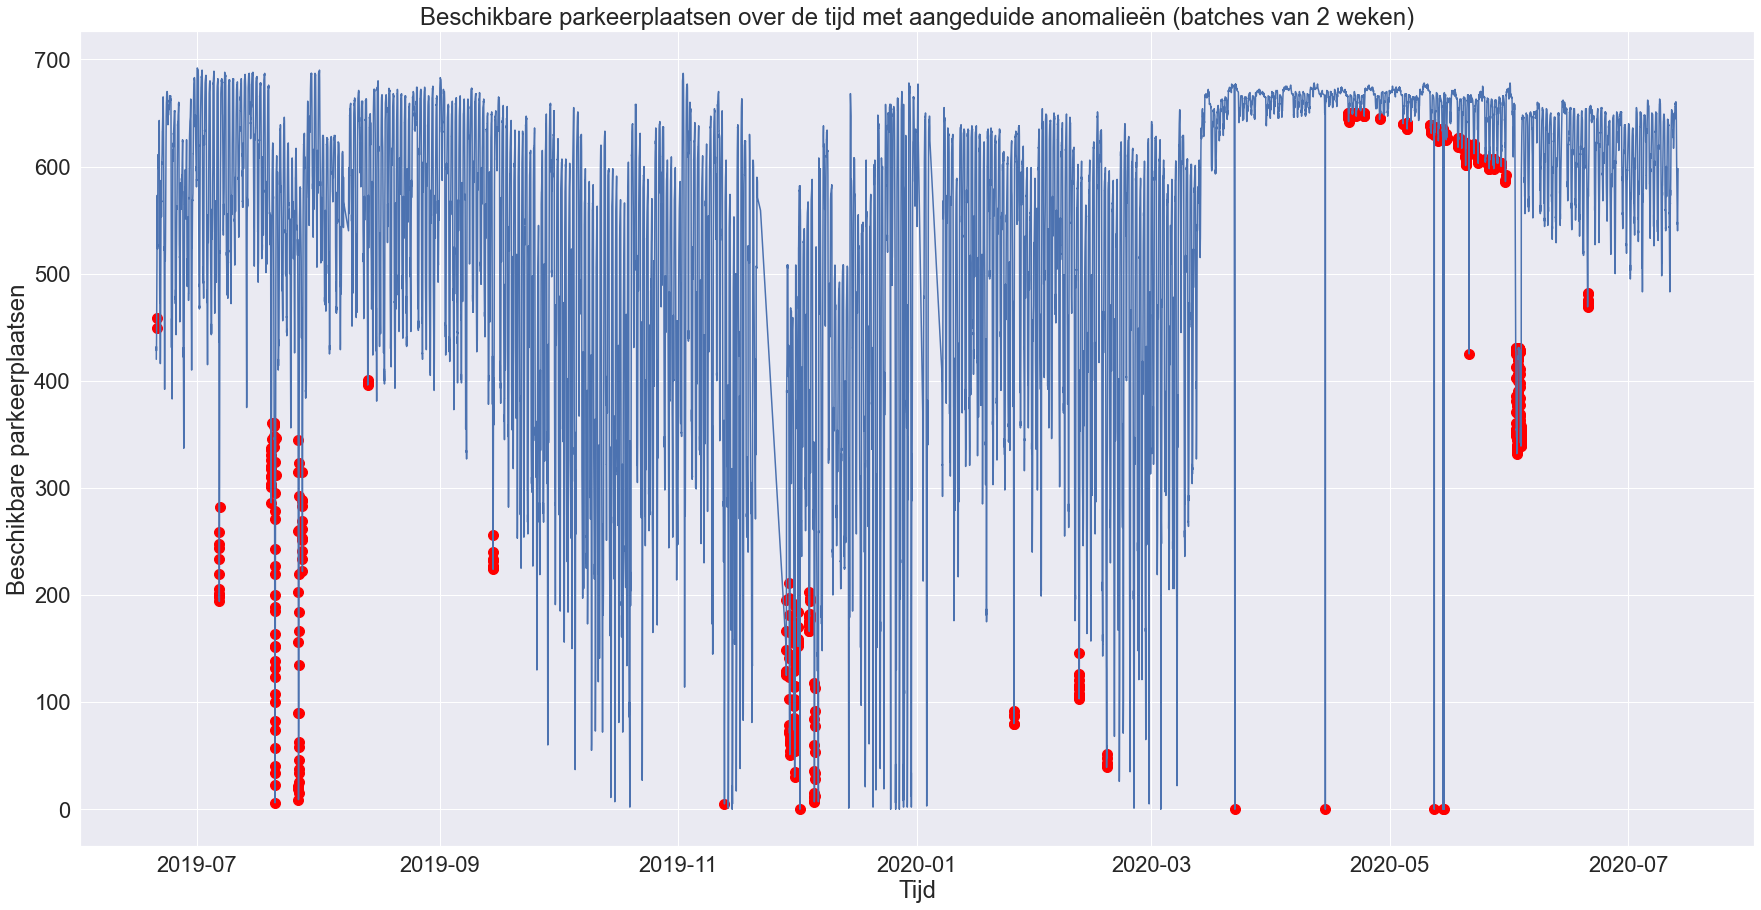

In [28]:
# Plotten van beide grafieken
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)

plt.plot(parking_timestamp_index_week.index, parking_timestamp_index_week['value'])
plt.scatter(anomalies_week['timestamp'], anomalies_week['value'], c='Red', s=100)
plt.xlabel("Tijd")
plt.ylabel("Beschikbare parkeerplaatsen")
plt.title("Beschikbare parkeerplaatsen over de tijd met aangeduide anomalieën (batches van 2 weken)")
plt.show()

### Detecteren van anomalieën a.d.h.v. interkwartielafstanden op basis van 3 dagen data

In [24]:
anomalies_days = pd.DataFrame(columns=['timestamp', 'value'])
start_time = time.time()
for _, row in parking_data.iterrows():
    # get batch of previous 2 days of data
    current_timestamp = row['timestamp']
    days_prior = current_timestamp - timedelta(days=3)
    past_days_data = parking_data[(parking_data['timestamp'] >= days_prior) & (parking_data['timestamp'] <= current_timestamp)]
    quantiles = past_days_data['value'].quantile([0.25, 0.75])
    iqr = quantiles[0.75] - quantiles[0.25]
    min_value = quantiles[0.25] - 1.5*iqr
    max_value = quantiles[0.75] + 1.5*iqr
    if not min_value <= row['value'] <= max_value:
        anomalies_days = anomalies_days.append(row)
        
execution_time_days = time.time() - start_time

In [25]:
print(f'Script executed in: {execution_time_days} seconds')
print('')
print(anomalies_days)

Script executed in: 55.652976751327515 seconds

                timestamp value
8     2019-06-20 14:59:00   449
9     2019-06-20 15:14:00   459
1543  2019-07-06 14:58:00   220
1544  2019-07-06 15:14:00   206
1545  2019-07-06 15:27:00   198
...                   ...   ...
33371 2020-06-08 15:44:00   571
33372 2020-06-08 15:59:00   579
35568 2020-07-01 13:13:00   501
35569 2020-07-01 13:27:00   495
35570 2020-07-01 13:42:00   497

[883 rows x 2 columns]


In [26]:
# Kolom met timestamps omzetten naar DateTime types en instellen als index voor het originele DataFrame
parking_timestamp_index_days = parking_data.copy(deep=True)
parking_timestamp_index_days['timestamp'] = pd.to_datetime(parking_timestamp_index_days['timestamp'])
parking_timestamp_index_days = parking_timestamp_index_days.set_index('timestamp')

# Timestamp bij anomalieën ook omzetten naar DateTime types
anomalies_days['timestamp'] = pd.to_datetime(anomalies_days['timestamp'])

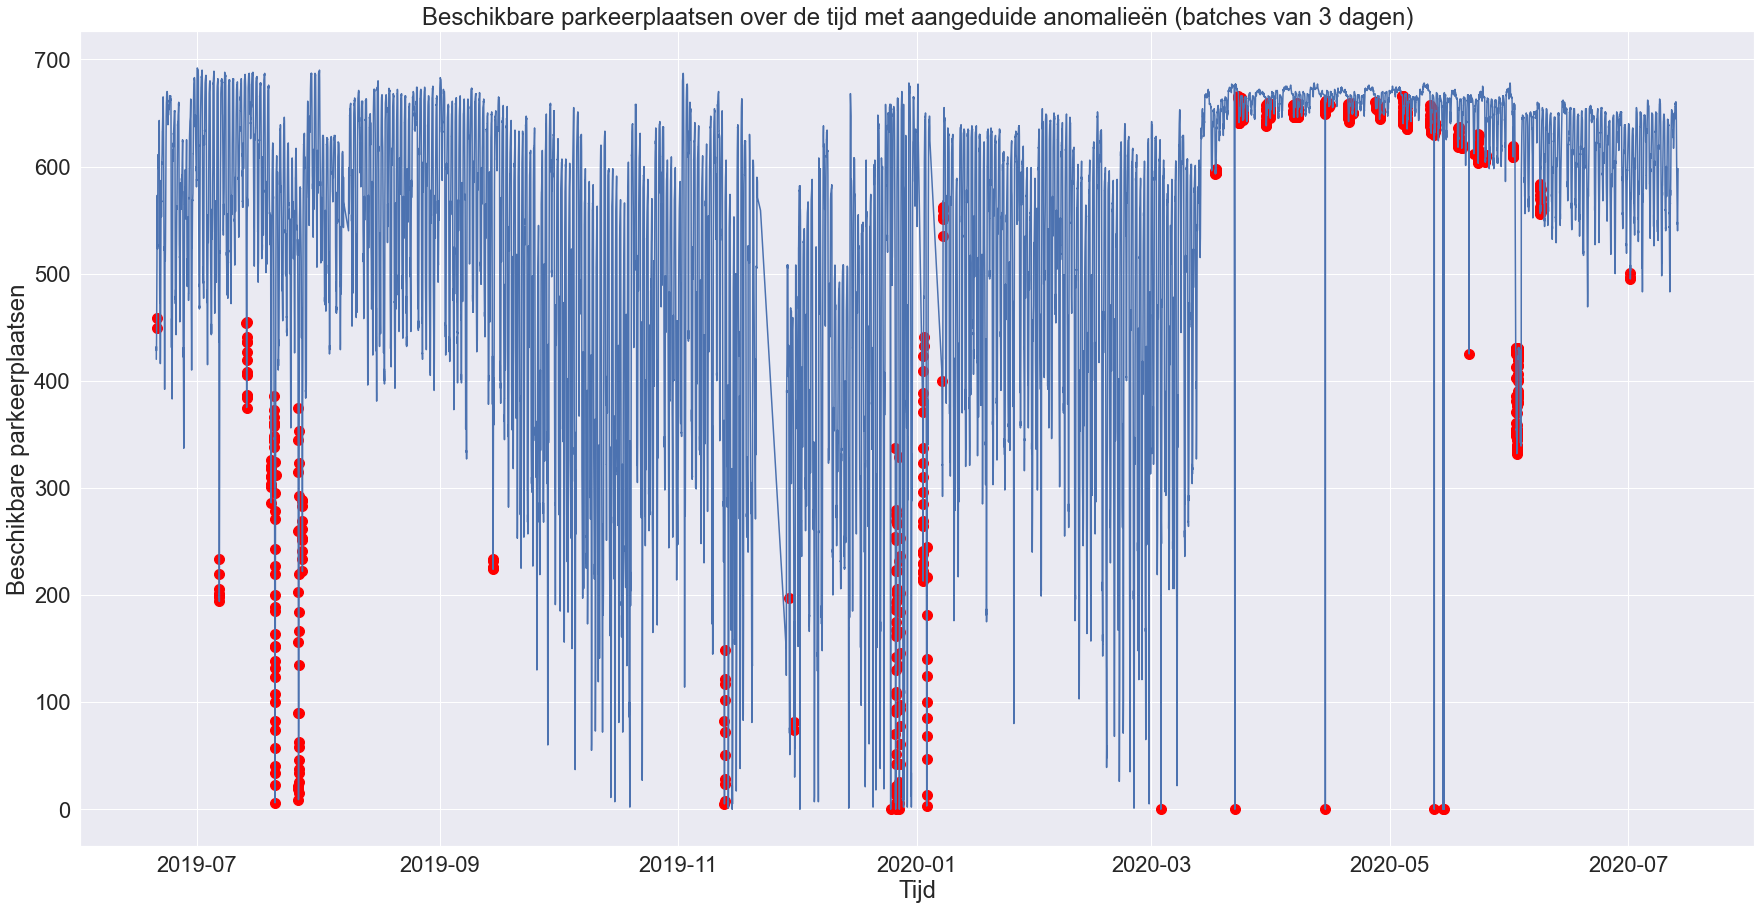

In [27]:
# Plotten van beide grafieken
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)

plt.plot(parking_timestamp_index_days.index, parking_timestamp_index_days['value'])
plt.scatter(anomalies_days['timestamp'], anomalies_days['value'], c='Red', s=100)
plt.xlabel("Tijd")
plt.ylabel("Beschikbare parkeerplaatsen")
plt.title("Beschikbare parkeerplaatsen over de tijd met aangeduide anomalieën (batches van 3 dagen)")
plt.show()